In [52]:
#! env/scripts/python.exe
# under python 3.9.4 in utf-8
# Anthony PARISOT/Clément VIDAL

In [53]:
import pandas as pd
import sklearn as sk
import os
from matplotlib import pyplot as plt

In [54]:
def interpolationLineaire(x, xa, xb, ya, yb):
    """Fait une interpolation linéaire pour trouver un résultat y entre deux valeur xa et xb """
    y = ya + (x - xa) * ((yb - ya)/(xb - xa))
    return y

In [55]:
dir = os.getcwd() + '\\data\\ACMB_Données vidal.xlsx'
df_excel = pd.read_excel(dir, sheet_name=0)

In [56]:
df_excel.head()

,Date,H10A,H11A,H12A,H1A,H2A,H4A,H6A,H7A,H8A,...,T11A,T12A,T1A,T2A,T4A,T6A,T7A,T8A,T9A,T10A
0,2011-04-12 14:15:16,0.000000,51.522690,51.363132,54.588825,50.522297,52.830837,45.194431,59.321507,60.030544,...,19.079998,19.279999,16.539997,14.939999,19.099998,19.840000,17.869999,18.340000,18.899998,19.059998
1,2011-04-12 14:30:16,0.000000,51.522690,51.330582,54.820488,48.370209,52.801228,45.563080,59.351727,60.060734,...,19.079998,19.270000,16.639999,15.289997,19.109997,19.730000,17.860001,18.340000,18.910000,19.070000
2,2011-04-12 14:45:16,546.830200,51.463135,51.269573,55.062439,47.855869,52.739185,44.786007,59.324669,60.063934,...,19.099998,19.279999,16.849998,15.899998,19.109997,19.889999,17.889999,18.359997,18.910000,19.090000
3,2011-04-12 15:00:16,638.621399,51.083607,50.743034,55.246273,47.542191,52.636280,39.539619,59.356472,60.070328,...,19.059998,19.079998,17.059998,15.889999,19.059998,18.759998,17.899998,18.399998,18.939999,19.070000
4,2011-04-12 15:15:16,701.131531,50.097813,49.626957,55.392223,48.189533,52.661697,41.100544,59.393024,60.075127,...,18.930000,18.919998,17.219997,14.629997,19.000000,19.639999,17.939999,18.430000,18.899998,19.039997


In [57]:
df_excel.shape

(337, 21)

In [58]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    337 non-null    datetime64[ns]
 1   H10A    337 non-null    float64       
 2   H11A    337 non-null    float64       
 3   H12A    337 non-null    float64       
 4   H1A     337 non-null    float64       
 5   H2A     337 non-null    float64       
 6   H4A     337 non-null    float64       
 7   H6A     337 non-null    float64       
 8   H7A     337 non-null    float64       
 9   H8A     337 non-null    float64       
 10  H9A     337 non-null    float64       
 11  T11A    337 non-null    float64       
 12  T12A    337 non-null    float64       
 13  T1A     337 non-null    float64       
 14  T2A     337 non-null    float64       
 15  T4A     337 non-null    float64       
 16  T6A     337 non-null    float64       
 17  T7A     337 non-null    float64       
 18  T8A     33

In [59]:
for i in range(1,df_excel.shape[1],1):
    print(i)
    df_test = df_excel.iloc[:,i]
    print(df_test)
    for j in range(0,df_test.shape[0]):
        
        if j == 0 or j == df_test.shape[0]-1:
            val = df_test.iloc[j]
        else:
            val = df_test.iloc[j]
            val_start = df_test.iloc[j-1]
            val_end = df_test.iloc[j+1]

            if val > 100 or val < 0:
                new = interpolationLineaire(j, j-1, j+1, val_start, val_end)
                print('val :', val_start, val, val_end)
                print(new)

1
0        0.000000
1        0.000000
2      546.830200
3      638.621399
4      701.131531
          ...    
332    595.127502
333    598.680664
334    606.774170
335    599.799316
336    594.535339
Name: H10A, Length: 337, dtype: float64
val : 0.0 546.8302 638.621399
319.3106995
val : 546.8302 638.621399 701.131531
623.9808654999999
val : 638.621399 701.131531 720.805847
679.713623
val : 701.131531 720.805847 657.045471
679.088501
val : 720.805847 657.045471 602.431274
661.6185605000001
val : 657.045471 602.431274 588.547485
622.796478
val : 602.431274 588.547485 566.899292
584.665283
val : 588.547485 566.899292 556.239624
572.3935545
val : 566.899292 556.239624 553.081238
559.9902649999999
val : 556.239624 553.081238 561.503723
558.8716735
val : 553.081238 561.503723 558.871643
555.9764405
val : 561.503723 558.871643 559.595459
560.549591
val : 558.871643 559.595459 562.951294
560.9114685
val : 559.595459 562.951294 563.740845
561.668152
val : 562.951294 563.740845 561.37207
562.161

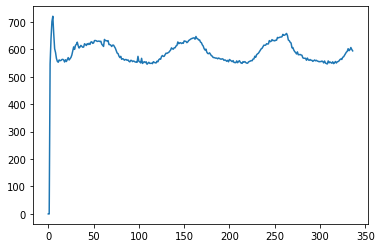

In [60]:
plt.plot(range(df_excel.shape[0]),df_excel['H10A'])

In [61]:
df_excel.pop("H10A")

0        0.000000
1        0.000000
2      546.830200
3      638.621399
4      701.131531
          ...    
332    595.127502
333    598.680664
334    606.774170
335    599.799316
336    594.535339
Name: H10A, Length: 337, dtype: float64